### Read an image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
      
# Read the image and get its shape
img = plt.imread('./Images/einstein.jpg', 0)
img_row, img_col = img.shape

## Smooth Filtering in spatial domain

In [3]:
# Develop mask for smoothing
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Get a new image to save filtered image
img_new = np.zeros([img_row, img_row])

# Apply filtering
for i in range(1, img_row-1):
    for j in range(1, img_row-1):
        newValue = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]    
        img_new[i, j]= newValue

### Show result

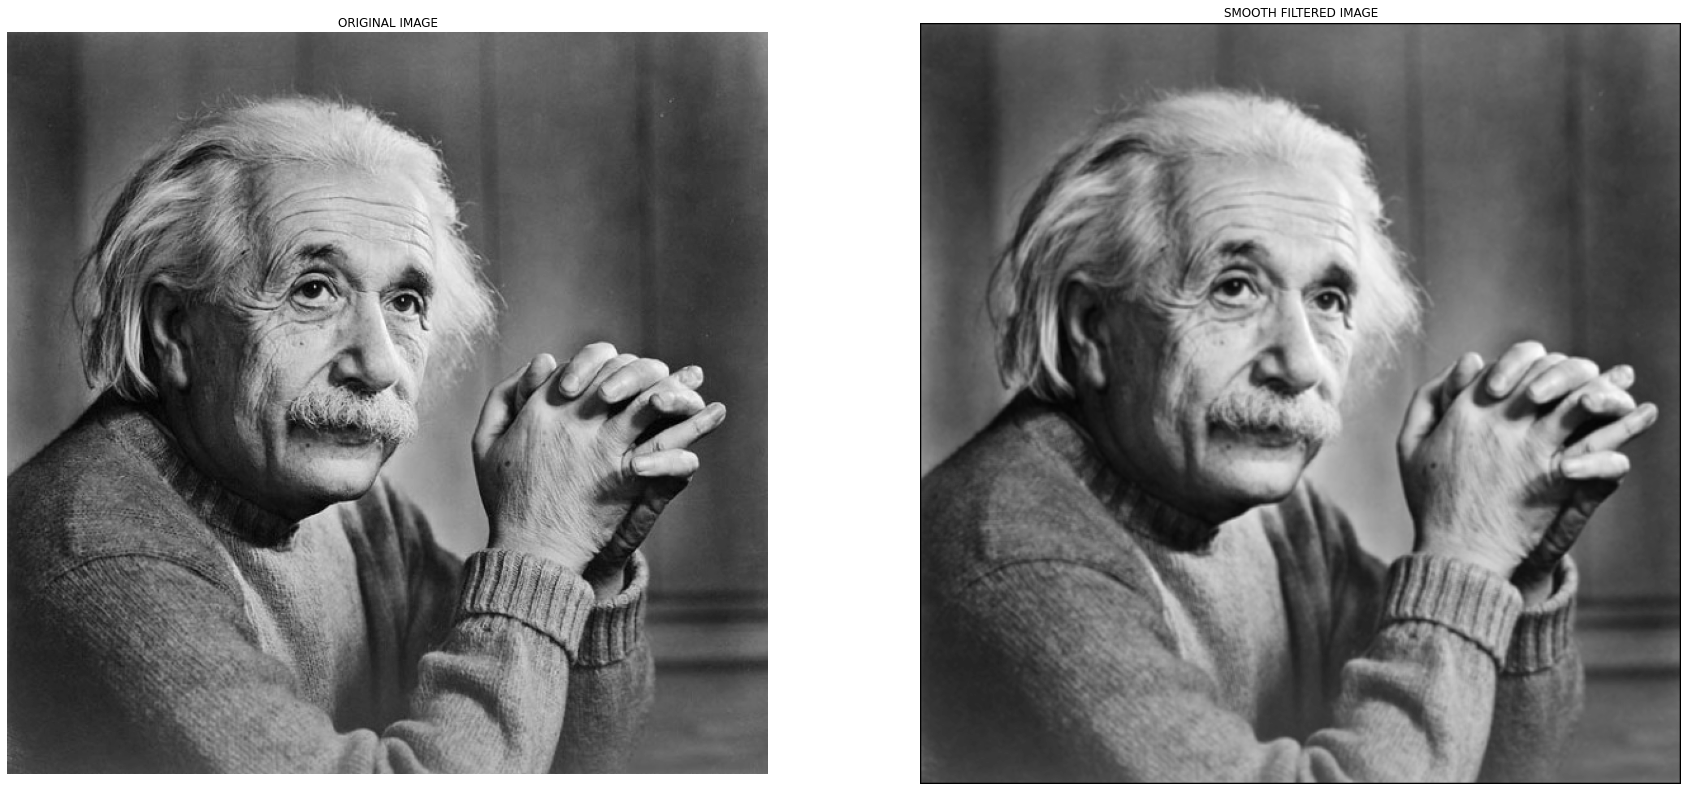

In [3]:
# Show Original Image
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("ORIGINAL IMAGE")

plt.subplot(1, 2, 2)
plt.imshow(img_new, cmap="gray")
plt.axis("off")
plt.title("SMOOTH FILTERED IMAGE")

# Show the fig
plt.show()

## Sharpening filter in spatial domain

In [46]:
# Develop mask for sharpening
mask = np.array([[0, -1, -0], [-1, 8, -1], [-0, -1, -0]])
mask = mask / 4

# Get a new image to save filtered image
img_new = np.zeros([img_row, img_row])

# Apply filtering
for i in range(1, img_row-1):
    for j in range(1, img_row-1):
        newValue = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]    
        img_new[i, j]= newValue

### Show the result

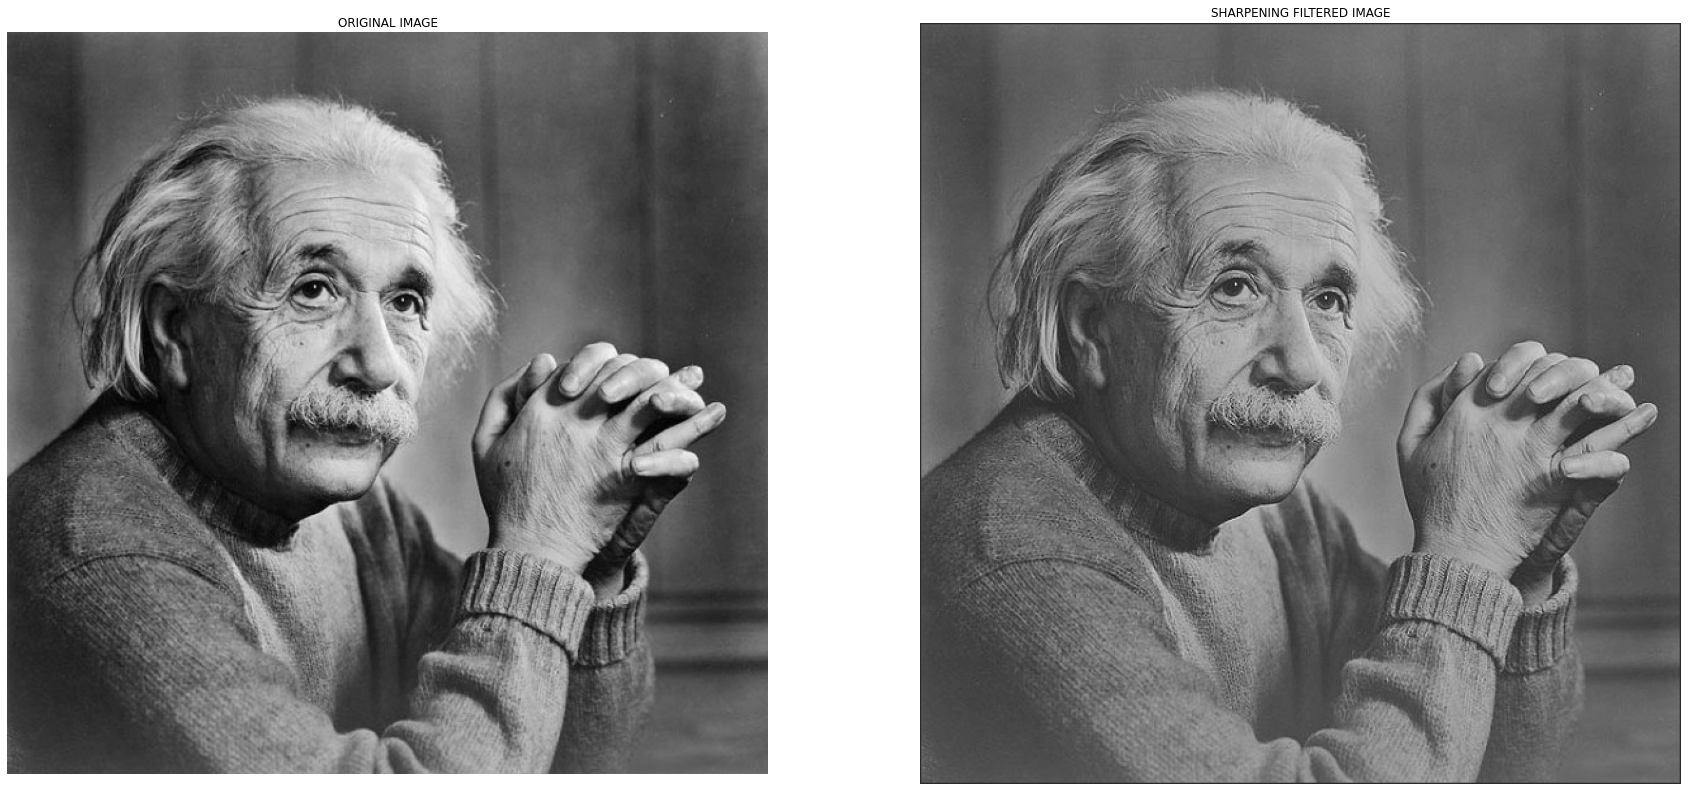

In [49]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("ORIGINAL IMAGE")

plt.subplot(1, 2, 2)
plt.imshow(img_new, cmap="gray")
plt.axis("off")
plt.title("SHARPENING FILTERED IMAGE")

# Show the fig
plt.show()

## Smooth Filtering in frequency domain

In [21]:
# Define masking shape and sigma constant
maskingShape = img.shape
sigma = 30

# Creating mask and its sum
m, n = [(s - 1.0) / 2.0 for s in maskingShape]
y, x = np.ogrid[-m:m+1, -n:n+1]

mask = np.exp( -(x * x + y * y) / (2.0 * sigma * sigma) )
sum_of_mask = mask.sum()

# Divide all masks with the sum
if sum_of_mask != 0:
    mask /= sum_of_mask

# Find maximum and minimum mask
mask_max, mask_min = np.amax(mask), np.amin(mask)

# Now develop a gray mask
gray_mask = (mask - mask_min) / (mask_max - mask_min)

# Shift the zero-frequency component to the center of the spectrum after 
# Computing the 2-dimensional discrete Fourier Transform
ft_img = np.fft.fftshift(np.fft.fft2(img))

# Now filter the image by multiplying gray mask
filtered_multiplied_img = np.multiply(ft_img, gray_mask)

# Computes the inverse of the 2-dimensional discrete Fourier Transform
inv_ft_img = np.fft.ifft2(filtered_multiplied_img)

#output Image
output_image = np.abs(inv_ft_img)

### Show the result

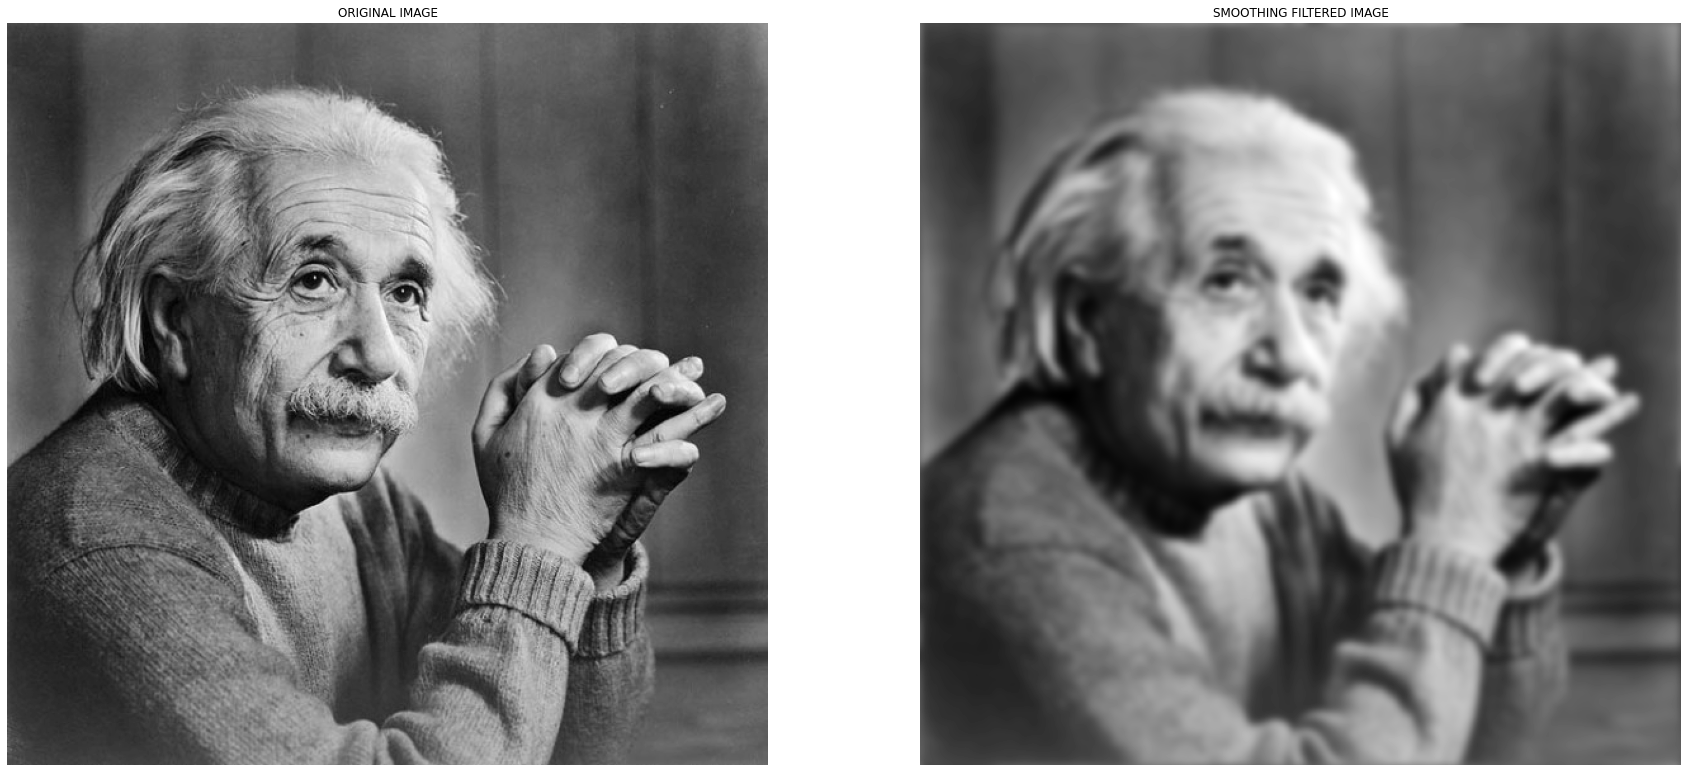

In [22]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("ORIGINAL IMAGE")

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap="gray")
plt.axis("off")
plt.title("SMOOTHING FILTERED IMAGE")

# Show the fig
plt.show()

## Sharpening filter in frequency domain

In [4]:
# Define masking shapes
maskingShape = img.shape
m, n = maskingShape[0]/2, maskingShape[1]/2

# Develop mask
y, x = np.ogrid[-m:m, -n:n]
mask = np.add(x**2, y**2) # [ Σ(x^2 + y^2) ]
mask = - ( 4 * np.pi**2 * mask ) # [ 4 x π^2 x mask ]

max_mask, min_mask = np.amax(mask), np.amin(mask)
mask = (mask - max_mask) / (max_mask - min_mask)

# Shift the zero-frequency component to the center of the spectrum after 
# Computing the 2-dimensional discrete Fourier Transform
ft_img = np.fft.fftshift(np.fft.fft2(img))

# Now filter the image by multiplying gray mask
ft_img = np.multiply(ft_img, mask)

# Computes the inverse of the 2-dimensional discrete Fourier Transform
inv_ft_img = np.fft.ifft2(ft_img)

# Take absolute values of inverted fourier transformed values and divide all
# values by maximum values to detect sharpen edges
sharpen_img = np.abs(inv_ft_img)
max_value = np.amax(sharpen_img)
sharpen_img = sharpen_img / max_value

# Sum with original image
output = img + sharpen_img


### Show the result

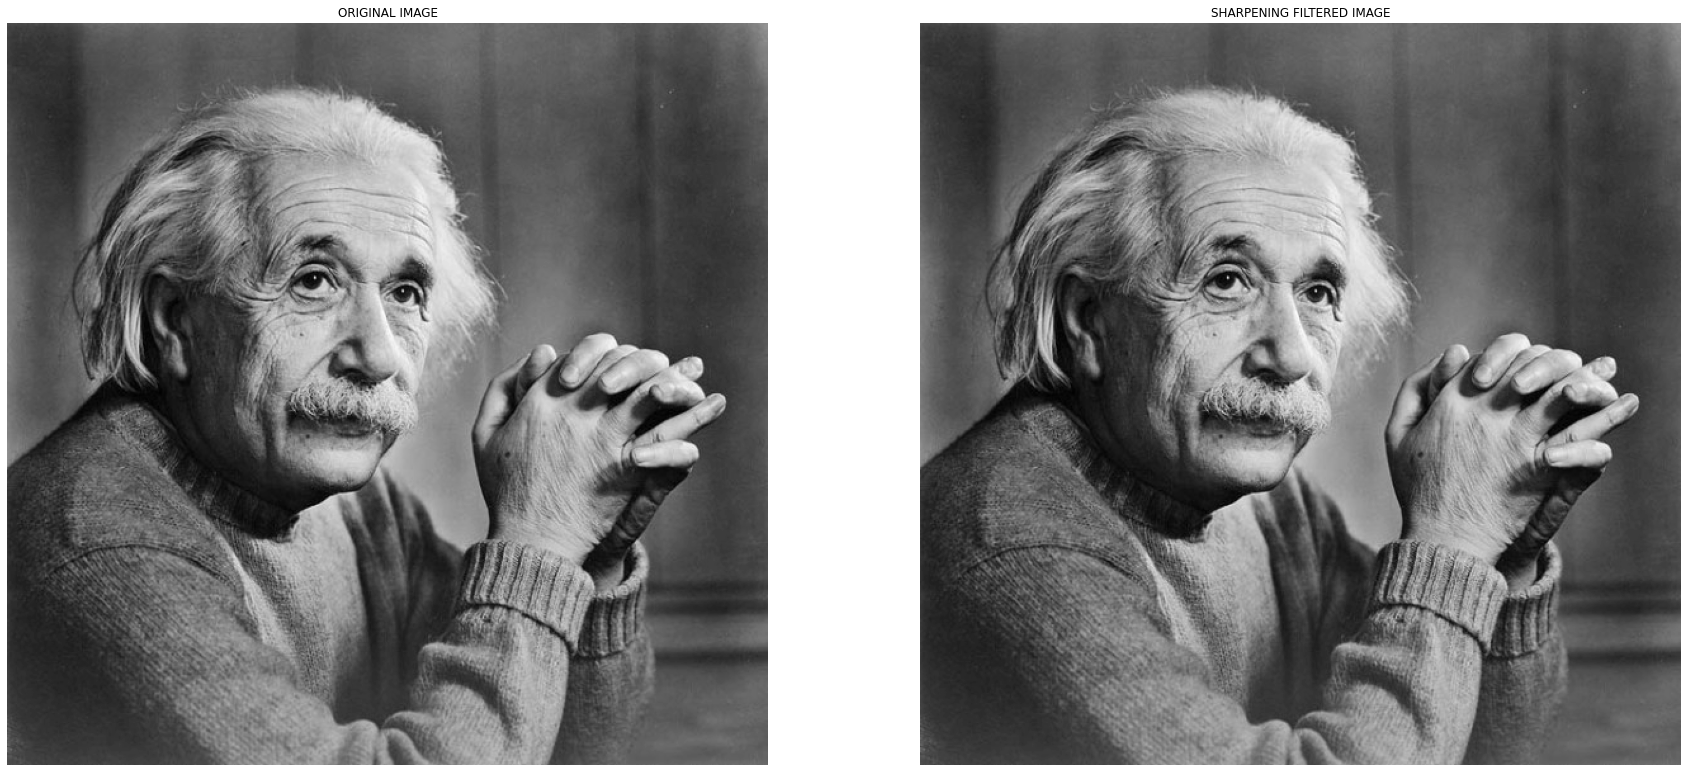

In [5]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("ORIGINAL IMAGE")

plt.subplot(1, 2, 2)
plt.imshow(output, cmap="gray")
plt.axis("off")
plt.title("SHARPENING FILTERED IMAGE")

# Show the fig
plt.show()